In [1]:
import pandas as pd
import os
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load the first dataset
course_problem = pd.read_csv("/kaggle/input/filter-course-by-problem-1/count_course_problem.csv")
course_problem

,course_id,count_course_id
0,C_707456,174712
1,C_2286754,143147
2,C_797404,126977
3,C_1794790,87057
4,C_1822804,84596
...,...,...
558,C_948141,1
559,C_735357,1
560,C_707054,1
561,C_2328554,1


In [3]:
# Load the first dataset
course_problem = pd.read_csv("/kaggle/input/filter-course-by-problem-1/count_course_problem.csv")

# Loop through the remaining files and concatenate them
for i in range(1, 10):
    course_problem_add = pd.read_csv(f'/kaggle/input/filter-course-by-problem-{i+1}/count_course_problem.csv')
    course_problem = pd.concat([course_problem, course_problem_add], ignore_index=True)
    
# Display the resulting DataFrame
course_problem

,course_id,count_course_id
0,C_707456,174712
1,C_2286754,143147
2,C_797404,126977
3,C_1794790,87057
4,C_1822804,84596
...,...,...
6389,C_1755907,1
6390,C_1766166,1
6391,C_2226108,1
6392,C_947794,1


In [4]:
# Group by course_id and sum the count_course_id
course_problem_grouped = course_problem.groupby("course_id", as_index=False)["count_course_id"].sum()

# Display the result
course_problem_grouped

,course_id,count_course_id
0,C_1017355,83542
1,C_1017419,8502
2,C_1025064,6595
3,C_1025076,1041
4,C_1025079,133
...,...,...
1189,C_948488,31982
1190,C_949439,372
1191,C_949541,6074
1192,C_949542,145015


In [5]:
course_problem_grouped['count_course_id'].value_counts()

count_course_id
1       23
5       13
13      12
4       12
3       11
        ..
7066     1
756      1
37       1
1415     1
847      1
Name: count, Length: 813, dtype: int64

In [6]:
course_problem_grouped['count_course_id'].value_counts().sort_index()

count_course_id
1          23
2           9
3          11
4          12
5          13
           ..
414562      1
470213      1
597482      1
1341980     1
3315796     1
Name: count, Length: 813, dtype: int64

In [7]:
course_problem_grouped['count_course_id'].describe()

count    1.194000e+03
mean     1.238892e+04
std      1.092369e+05
min      1.000000e+00
25%      6.425000e+01
50%      3.660000e+02
75%      2.894500e+03
max      3.315796e+06
Name: count_course_id, dtype: float64

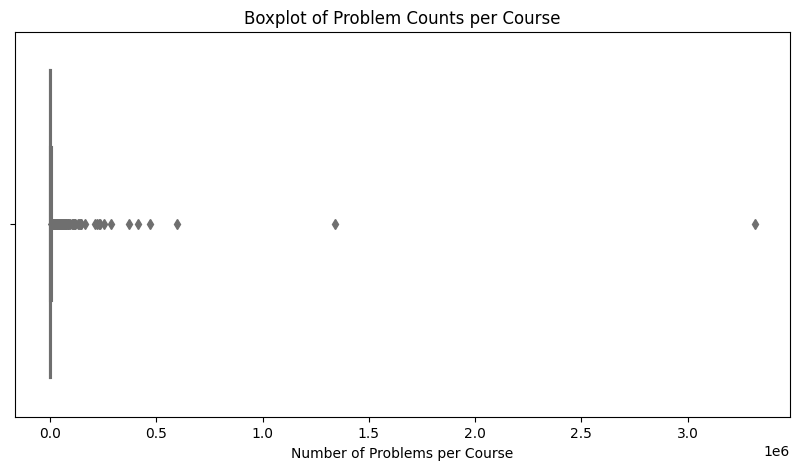

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=course_problem_grouped['count_course_id'], color='skyblue')

plt.xlabel('Number of Problems per Course')
plt.title('Boxplot of Problem Counts per Course')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

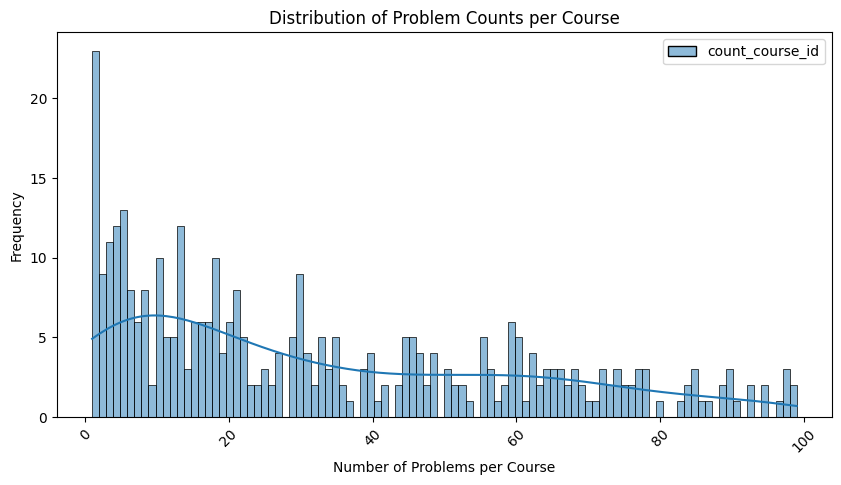

In [9]:
# Plot bar chart
plt.figure(figsize=(10, 5))
sns.histplot(course_problem_grouped[course_problem_grouped['count_course_id']<100], bins=100, kde=True, color="blue")
# Labels and title
plt.xlabel('Number of Problems per Course')
plt.ylabel('Frequency')
plt.title('Distribution of Problem Counts per Course')

# Show plot
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [10]:
limit_course_info = pd.read_csv("/kaggle/input/merge-problem/course_info_limit.csv")
limit_course_info

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id
0,C_674968,巴蜀文化,"['中国语言文学', '民族学']",2,[],0,巴蜀文化是中华文明绽放于西南大地的灿烂之花。本课程将从考古、历史、文学、宗教、哲学、艺术、地...,"[{'titles': ['第一章:导论 —— 巴蜀文化的悠久历程与风格特色', '1.1:...",183
1,C_674971,宝玉石鉴赏,[],0,[],0,【国家精品课】宝玉石，既是自然美的精华，也是财富身份的象征。《宝玉石鉴赏》让你了解宝石的自然...,"[{'titles': ['第一讲 序言', '1.1 宝玉石的基本概念、属性和种类', '...",23573
2,C_676642,创办新企业,['工商管理'],1,[],0,《创办新企业》课程由清华科技园和清华大学经济管理学院联合开设，是国家首批精品在线开放课程；获...,"[{'titles': ['第一章：《创办新企业》--创业者的梦想课堂--梅萌', '第一节...",19564
3,C_676664,大国航母与舰载机,[],0,[],0,本课程将带您走进大国航母与舰载机的世界，为您揭开世界各国现役航母神秘的面纱！,"[{'titles': ['第1章 美国航母与舰载机', '1.1尼米兹级核动力航母', '...",1090
4,C_676705,民法与生活,['法学'],1,['无'],1,本课程是一门面向非法学专业学生及社会人士修读的法律类课程。民法源于生活，人的一生无时无刻不与...,"[{'titles': ['绪论', '绪论', 'Video'], 'resource_i...",274
...,...,...,...,...,...,...,...,...,...
1087,C_2342500,数字逻辑电路,[],0,['大学物理；电路分析；模拟电子线路'],1,万物联网，数据汪洋。数字技术的发展推动人类社会的进步，山川无语多灵秀，人类造化演智能。信息化...,[{'titles': ['Chapter1 Introductory Concepts'...,67
1088,C_2342508,文学批评的方法与实践,[],0,['无'],1,让你在不知道作者是何人，写于何时何地，没有任何提示的状况下，依然可以深入文本，细致分析，综合...,"[{'titles': ['导论 理解文学批评', '第一节 为什么需要批评', '导论1...",90
1089,C_2342518,客户关系管理,[],0,[],0,本课程将带您置身华为、阿里、星巴克、海底捞、迪士尼等知名企业，看企业如何建立...,"[{'titles': ['项目一：走进客户关系管理', '1-1 客户关系是否要靠“搞关系...",488
1090,C_2343056,运动训练基本原理与方法,[],0,"['先修运动训练学', '运动解剖学', '运动生理学', '运动医学等基础课程。\t']",4,运动训练基本原理与方法是体育学的专业核心课程，通过该课程的学习，学生不仅能够掌握运动训练的基...,"[{'titles': ['一、基础理论', '1.运动训练学及其理论体系', '1.运动训...",154


## Course with detail problem

In [11]:
# Load the first dataset
course_detail_problem = pd.read_csv("/kaggle/input/filter-course-by-problem-1/user_problem_course_detail")

# Loop through the remaining files and concatenate them
for i in range(1, 10):
    course_detail_problem_add = pd.read_csv(f'/kaggle/input/filter-course-by-problem-{i+1}/user_problem_course_detail')
    course_detail_problem = pd.concat([course_detail_problem, course_detail_problem_add], ignore_index=True)
    
# Display the resulting DataFrame
course_detail_problem

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,problem_id,user_id,is_correct,attempts,score,submit_time,exercise_id,course_id,title_pm_info,content_pm_info,option_pm_info,answer_pm_info,score_pm_info,type_pm_info,typetext_pm_info,location_pm_info,context_id_pm_info,exercise_id_pm_info,language_pm_info
0,Pm_6906522,U_10000,0,1,NaN,2020-10-27 10:11:56,Ex_7007033,C_2033958,第八章习题,"党的十九大报告指出,全党必须牢记,()的问题是检验一个政党、一个政权性质的试金石。","{'A': '为什么人', 'B': '依法治国', 'C': '建党宗旨', 'D': '...","[""A""]",1.0,1.0,单选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese
1,Pm_6906523,U_10000,0,1,NaN,2020-10-27 10:12:13,Ex_7007033,C_2033958,第八章习题,"《危险化学品企业事故隐患排查治理实施导则》规定,涉及重点监管危险化工工艺、重点监管危险化学品...","{'A': '应急演练', 'B': '隐患排查', 'C': '危险与可操作性分析', '...","[""C""]",1.0,1.0,单选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese
2,Pm_6906524,U_10000,1,1,NaN,2020-10-27 10:12:28,Ex_7007033,C_2033958,第八章习题,"根据我国和化工行业标准《责任关怀实施准则》,企业应对其提供的产品给予安全监管支持,当发现产品...","{'A': '向主管部门举报', 'B': '终止产品的销售', 'C': '向新闻媒体公开...","[""B""]",1.0,1.0,单选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese
3,Pm_6906525,U_10000,0,1,NaN,2020-10-27 10:14:56,Ex_7007033,C_2033958,第八章习题,"责任关怀旨在改善各化工企业生产经营活动中的健康安全及环境表现,提高()对化工行业的认识和参与水平。","{'A': '当地社区', 'B': '公众', 'C': '全社会', 'D': '其他行业'}","[""A""]",1.0,1.0,单选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese
4,Pm_6906526,U_10000,0,1,NaN,2020-10-27 10:15:18,Ex_7007033,C_2033958,第八章习题,我国注册化工工程师应履行以下义务（ ）,"{'A': '遵守法律、法规和职业道德，维护社会公众利益', 'B': '保证执业工作的质量...","[""A"", ""B"", ""C""]",2.0,2.0,多选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14792369,Pm_6093583,U_99772,1,1,1.0,2020-08-28 15:10:25,Ex_6179349,C_1903985,第七章思考题,在换股型公司分拆中，母公司将其在子公司所拥有的股份，以股息的形式按比例分配给现有母公司的股东。,"{'true': '正确', 'false': '错误'}","[""false""]",1.0,6.0,判断题,7.3,"[6392162, 6392163, 6392166, 6392169]",Ex_6179349,Chinese
14792370,Pm_6093584,U_99772,1,1,2.0,2020-08-27 17:12:01,Ex_6179349,C_1903985,第七章思考题,资产重组的类型包括哪些？,"{'A': '业务重组', 'B': '财务重组', 'C': '资产组合重组', 'D':...","[""A"", ""B"", ""C"", ""D""]",2.0,2.0,多选题,7.3,"[6392162, 6392163, 6392166, 6392169]",Ex_6179349,Chinese
14792371,Pm_6093585,U_99772,1,1,2.0,2020-08-28 14:07:19,Ex_6179349,C_1903985,第七章思考题,以下哪些是资产剥离型重组?,"{'A': '股权分拆上市', 'B': '派股型公司分拆', 'C': '借壳上市', '...","[""A"", ""B"", ""D""]",2.0,2.0,多选题,7.3,"[6392162, 6392163, 6392166, 6392169]",Ex_6179349,Chinese
14792372,Pm_6093586,U_99772,1,1,2.0,2020-08-29 01:22:32,Ex_6179349,C_1903985,第七章思考题,以下哪些是资产增加型重组?,"{'A': '股权分拆上市', 'B': '派股型公司分拆', 'C': '借壳上市', '...","[""C"", ""E""]",2.0,2.0,多选题,7.3,"[6392162, 6392163, 6392166, 6392169]",Ex_6179349,Chinese


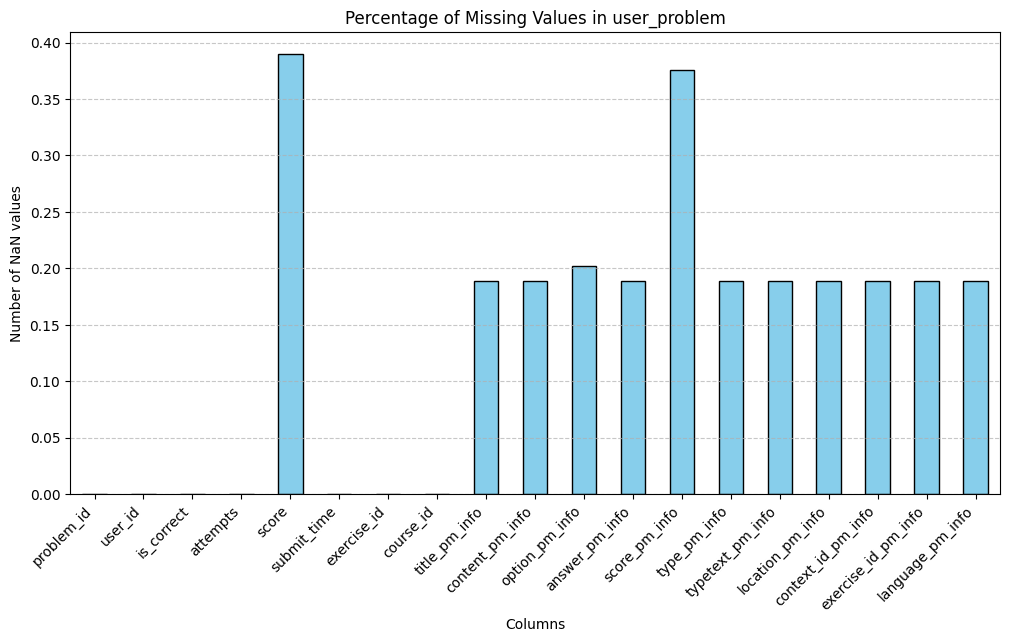

In [12]:
# Count NaN values per column
nan_counts = course_detail_problem.isna().mean()

# Plot bar chart
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize plot
plt.xlabel("Columns")
plt.ylabel("Number of NaN values")
plt.title("Percentage of Missing Values in user_problem")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [13]:
course_limit = pd.read_csv("/kaggle/input/course-limit-with-final/filter_course_with_final.csv", usecols=['course_id'])


In [14]:
course_limit

,course_id
0,C_674968
1,C_674971
2,C_676642
3,C_676664
4,C_676705
...,...
882,C_2342499
883,C_2342500
884,C_2342508
885,C_2342518


In [15]:
# Filter by course_id and merge
course_detail_problem_filtered = course_detail_problem[
    course_detail_problem['course_id'].isin(course_limit['course_id'])
]

In [16]:
course_detail_problem_filtered

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,problem_id,user_id,is_correct,attempts,score,submit_time,exercise_id,course_id,title_pm_info,content_pm_info,option_pm_info,answer_pm_info,score_pm_info,type_pm_info,typetext_pm_info,location_pm_info,context_id_pm_info,exercise_id_pm_info,language_pm_info
0,Pm_6906522,U_10000,0,1,NaN,2020-10-27 10:11:56,Ex_7007033,C_2033958,第八章习题,"党的十九大报告指出,全党必须牢记,()的问题是检验一个政党、一个政权性质的试金石。","{'A': '为什么人', 'B': '依法治国', 'C': '建党宗旨', 'D': '...","[""A""]",1.0,1.0,单选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese
1,Pm_6906523,U_10000,0,1,NaN,2020-10-27 10:12:13,Ex_7007033,C_2033958,第八章习题,"《危险化学品企业事故隐患排查治理实施导则》规定,涉及重点监管危险化工工艺、重点监管危险化学品...","{'A': '应急演练', 'B': '隐患排查', 'C': '危险与可操作性分析', '...","[""C""]",1.0,1.0,单选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese
2,Pm_6906524,U_10000,1,1,NaN,2020-10-27 10:12:28,Ex_7007033,C_2033958,第八章习题,"根据我国和化工行业标准《责任关怀实施准则》,企业应对其提供的产品给予安全监管支持,当发现产品...","{'A': '向主管部门举报', 'B': '终止产品的销售', 'C': '向新闻媒体公开...","[""B""]",1.0,1.0,单选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese
3,Pm_6906525,U_10000,0,1,NaN,2020-10-27 10:14:56,Ex_7007033,C_2033958,第八章习题,"责任关怀旨在改善各化工企业生产经营活动中的健康安全及环境表现,提高()对化工行业的认识和参与水平。","{'A': '当地社区', 'B': '公众', 'C': '全社会', 'D': '其他行业'}","[""A""]",1.0,1.0,单选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese
4,Pm_6906526,U_10000,0,1,NaN,2020-10-27 10:15:18,Ex_7007033,C_2033958,第八章习题,我国注册化工工程师应履行以下义务（ ）,"{'A': '遵守法律、法规和职业道德，维护社会公众利益', 'B': '保证执业工作的质量...","[""A"", ""B"", ""C""]",2.0,2.0,多选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14792369,Pm_6093583,U_99772,1,1,1.0,2020-08-28 15:10:25,Ex_6179349,C_1903985,第七章思考题,在换股型公司分拆中，母公司将其在子公司所拥有的股份，以股息的形式按比例分配给现有母公司的股东。,"{'true': '正确', 'false': '错误'}","[""false""]",1.0,6.0,判断题,7.3,"[6392162, 6392163, 6392166, 6392169]",Ex_6179349,Chinese
14792370,Pm_6093584,U_99772,1,1,2.0,2020-08-27 17:12:01,Ex_6179349,C_1903985,第七章思考题,资产重组的类型包括哪些？,"{'A': '业务重组', 'B': '财务重组', 'C': '资产组合重组', 'D':...","[""A"", ""B"", ""C"", ""D""]",2.0,2.0,多选题,7.3,"[6392162, 6392163, 6392166, 6392169]",Ex_6179349,Chinese
14792371,Pm_6093585,U_99772,1,1,2.0,2020-08-28 14:07:19,Ex_6179349,C_1903985,第七章思考题,以下哪些是资产剥离型重组?,"{'A': '股权分拆上市', 'B': '派股型公司分拆', 'C': '借壳上市', '...","[""A"", ""B"", ""D""]",2.0,2.0,多选题,7.3,"[6392162, 6392163, 6392166, 6392169]",Ex_6179349,Chinese
14792372,Pm_6093586,U_99772,1,1,2.0,2020-08-29 01:22:32,Ex_6179349,C_1903985,第七章思考题,以下哪些是资产增加型重组?,"{'A': '股权分拆上市', 'B': '派股型公司分拆', 'C': '借壳上市', '...","[""C"", ""E""]",2.0,2.0,多选题,7.3,"[6392162, 6392163, 6392166, 6392169]",Ex_6179349,Chinese


In [17]:
user_info = pd.read_csv("/kaggle/input/user-final/user_course_final.csv")
user_info

,user_id,school,course_id,user_enroll_time,user_past_course_count,user_time_since_last_course
0,U_10000,NaN,C_2033958,2020-10-27,0,0.0
1,U_1000129,云南民族大学,C_1925903,2020-09-06,0,0.0
2,U_1000129,云南民族大学,C_1992970,2020-09-06,1,0.0
3,U_1000129,云南民族大学,C_680884,2020-10-16,2,960.0
4,U_1000342,云南民族大学,C_697791,2020-02-28,0,0.0
...,...,...,...,...,...,...
2914323,U_999856,北京科技大学,C_696724,2020-02-23,0,0.0
2914324,U_999856,北京科技大学,C_696827,2020-02-25,1,48.0
2914325,U_999856,北京科技大学,C_947252,2020-03-01,2,120.0
2914326,U_999861,北京科技大学,C_947252,2019-12-31,0,0.0


In [18]:
# Merge 'user_enroll_time' from user_info into course_detail_problem_filtered
course_detail_problem_filtered = course_detail_problem_filtered.merge(
    user_info[['user_id', 'course_id', 'user_enroll_time']],
    on=['user_id', 'course_id'],
    how='inner'
)

In [19]:
course_detail_problem_filtered

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,problem_id,user_id,is_correct,attempts,score,submit_time,exercise_id,course_id,title_pm_info,content_pm_info,option_pm_info,answer_pm_info,score_pm_info,type_pm_info,typetext_pm_info,location_pm_info,context_id_pm_info,exercise_id_pm_info,language_pm_info,user_enroll_time
0,Pm_6906522,U_10000,0,1,NaN,2020-10-27 10:11:56,Ex_7007033,C_2033958,第八章习题,"党的十九大报告指出,全党必须牢记,()的问题是检验一个政党、一个政权性质的试金石。","{'A': '为什么人', 'B': '依法治国', 'C': '建党宗旨', 'D': '...","[""A""]",1.0,1.0,单选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese,2020-10-27
1,Pm_6906523,U_10000,0,1,NaN,2020-10-27 10:12:13,Ex_7007033,C_2033958,第八章习题,"《危险化学品企业事故隐患排查治理实施导则》规定,涉及重点监管危险化工工艺、重点监管危险化学品...","{'A': '应急演练', 'B': '隐患排查', 'C': '危险与可操作性分析', '...","[""C""]",1.0,1.0,单选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese,2020-10-27
2,Pm_6906524,U_10000,1,1,NaN,2020-10-27 10:12:28,Ex_7007033,C_2033958,第八章习题,"根据我国和化工行业标准《责任关怀实施准则》,企业应对其提供的产品给予安全监管支持,当发现产品...","{'A': '向主管部门举报', 'B': '终止产品的销售', 'C': '向新闻媒体公开...","[""B""]",1.0,1.0,单选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese,2020-10-27
3,Pm_6906525,U_10000,0,1,NaN,2020-10-27 10:14:56,Ex_7007033,C_2033958,第八章习题,"责任关怀旨在改善各化工企业生产经营活动中的健康安全及环境表现,提高()对化工行业的认识和参与水平。","{'A': '当地社区', 'B': '公众', 'C': '全社会', 'D': '其他行业'}","[""A""]",1.0,1.0,单选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese,2020-10-27
4,Pm_6906526,U_10000,0,1,NaN,2020-10-27 10:15:18,Ex_7007033,C_2033958,第八章习题,我国注册化工工程师应履行以下义务（ ）,"{'A': '遵守法律、法规和职业道德，维护社会公众利益', 'B': '保证执业工作的质量...","[""A"", ""B"", ""C""]",2.0,2.0,多选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese,2020-10-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11859325,Pm_6093583,U_99772,1,1,1.0,2020-08-28 15:10:25,Ex_6179349,C_1903985,第七章思考题,在换股型公司分拆中，母公司将其在子公司所拥有的股份，以股息的形式按比例分配给现有母公司的股东。,"{'true': '正确', 'false': '错误'}","[""false""]",1.0,6.0,判断题,7.3,"[6392162, 6392163, 6392166, 6392169]",Ex_6179349,Chinese,2020-08-01
11859326,Pm_6093584,U_99772,1,1,2.0,2020-08-27 17:12:01,Ex_6179349,C_1903985,第七章思考题,资产重组的类型包括哪些？,"{'A': '业务重组', 'B': '财务重组', 'C': '资产组合重组', 'D':...","[""A"", ""B"", ""C"", ""D""]",2.0,2.0,多选题,7.3,"[6392162, 6392163, 6392166, 6392169]",Ex_6179349,Chinese,2020-08-01
11859327,Pm_6093585,U_99772,1,1,2.0,2020-08-28 14:07:19,Ex_6179349,C_1903985,第七章思考题,以下哪些是资产剥离型重组?,"{'A': '股权分拆上市', 'B': '派股型公司分拆', 'C': '借壳上市', '...","[""A"", ""B"", ""D""]",2.0,2.0,多选题,7.3,"[6392162, 6392163, 6392166, 6392169]",Ex_6179349,Chinese,2020-08-01
11859328,Pm_6093586,U_99772,1,1,2.0,2020-08-29 01:22:32,Ex_6179349,C_1903985,第七章思考题,以下哪些是资产增加型重组?,"{'A': '股权分拆上市', 'B': '派股型公司分拆', 'C': '借壳上市', '...","[""C"", ""E""]",2.0,2.0,多选题,7.3,"[6392162, 6392163, 6392166, 6392169]",Ex_6179349,Chinese,2020-08-01


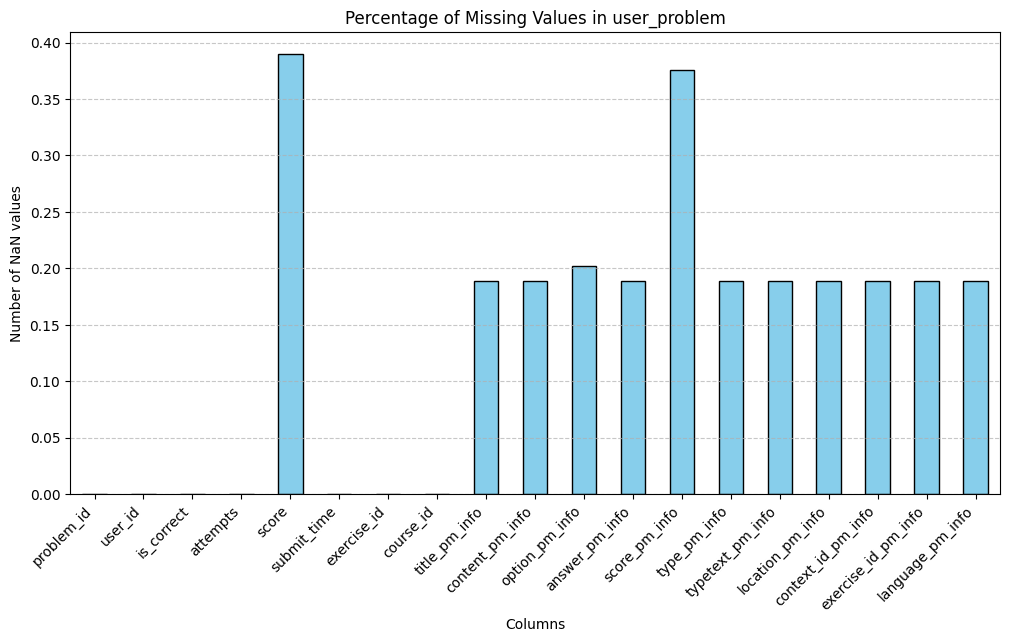

In [20]:
# Count NaN values per column
nan_counts = course_detail_problem.isna().mean()

# Plot bar chart
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize plot
plt.xlabel("Columns")
plt.ylabel("Number of NaN values")
plt.title("Percentage of Missing Values in user_problem")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [21]:
course_detail_problem_filtered[['submit_date', 'submit_clock_time']] = course_detail_problem_filtered['submit_time'].str.split(' ', expand=True)

In [22]:
def days_between_dates(start, end):
    # Check if either value is missing or empty
    if not start or not end or str(start).strip() == '' or str(end).strip() == '':
        return None  # or return 0 or np.nan depending on how you want to handle it
    
    try:
        start_dt = datetime.strptime(start.strip(), "%Y-%m-%d")
        end_dt = datetime.strptime(end.strip(), "%Y-%m-%d")
        return (end_dt - start_dt).days
    except ValueError:
        return None  # Catch any format issues gracefully

# Then apply it to the DataFrame
course_detail_problem_filtered['duration_days'] = course_detail_problem_filtered.apply(lambda row: days_between_dates(row['user_enroll_time'], row['submit_date']), axis=1)

In [23]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

In [24]:
course_detail_problem_filtered[course_detail_problem_filtered['is_correct']==0].describe()

,is_correct,attempts,score,score_pm_info,type_pm_info,duration_days
count,1830857.0,1.830857e+06,1.430657e+06,1.324523e+06,1.438175e+06,1.830857e+06
mean,0.0,1.158249e+00,8.272088e-02,1.524381e+00,2.215549e+00,4.115921e+01
std,0.0,5.162831e-01,1.137276e+00,1.994072e+00,1.889341e+00,5.060126e+01
min,0.0,1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
50%,0.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.100000e+01
75%,0.0,1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,6.700000e+01
max,0.0,6.400000e+01,9.200000e+01,1.000000e+02,6.000000e+00,4.450000e+02


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


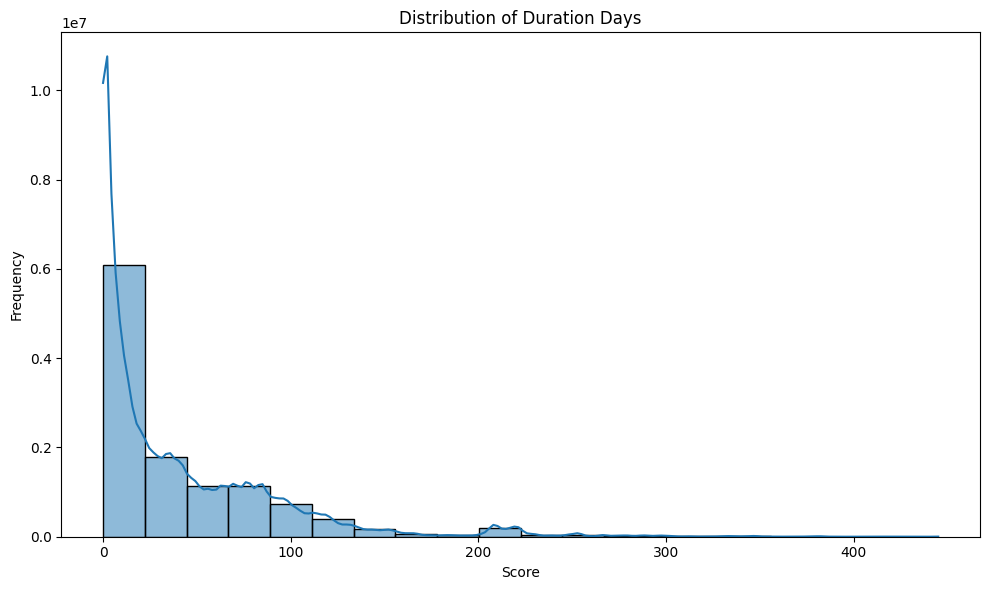

In [25]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(course_detail_problem_filtered['duration_days'], bins=20, kde=True)

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Duration Days')
plt.tight_layout()
plt.show()

In [26]:
course_detail_problem_filtered[
    (course_detail_problem_filtered['score'].isna()) &
    (course_detail_problem_filtered['score_pm_info'].notna())
]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,problem_id,user_id,is_correct,attempts,score,submit_time,exercise_id,course_id,title_pm_info,content_pm_info,option_pm_info,answer_pm_info,score_pm_info,type_pm_info,typetext_pm_info,location_pm_info,context_id_pm_info,exercise_id_pm_info,language_pm_info,user_enroll_time,submit_date,submit_clock_time,duration_days
0,Pm_6906522,U_10000,0,1,NaN,2020-10-27 10:11:56,Ex_7007033,C_2033958,第八章习题,"党的十九大报告指出,全党必须牢记,()的问题是检验一个政党、一个政权性质的试金石。","{'A': '为什么人', 'B': '依法治国', 'C': '建党宗旨', 'D': '...","[""A""]",1.0,1.0,单选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese,2020-10-27,2020-10-27,10:11:56,0
1,Pm_6906523,U_10000,0,1,NaN,2020-10-27 10:12:13,Ex_7007033,C_2033958,第八章习题,"《危险化学品企业事故隐患排查治理实施导则》规定,涉及重点监管危险化工工艺、重点监管危险化学品...","{'A': '应急演练', 'B': '隐患排查', 'C': '危险与可操作性分析', '...","[""C""]",1.0,1.0,单选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese,2020-10-27,2020-10-27,10:12:13,0
2,Pm_6906524,U_10000,1,1,NaN,2020-10-27 10:12:28,Ex_7007033,C_2033958,第八章习题,"根据我国和化工行业标准《责任关怀实施准则》,企业应对其提供的产品给予安全监管支持,当发现产品...","{'A': '向主管部门举报', 'B': '终止产品的销售', 'C': '向新闻媒体公开...","[""B""]",1.0,1.0,单选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese,2020-10-27,2020-10-27,10:12:28,0
3,Pm_6906525,U_10000,0,1,NaN,2020-10-27 10:14:56,Ex_7007033,C_2033958,第八章习题,"责任关怀旨在改善各化工企业生产经营活动中的健康安全及环境表现,提高()对化工行业的认识和参与水平。","{'A': '当地社区', 'B': '公众', 'C': '全社会', 'D': '其他行业'}","[""A""]",1.0,1.0,单选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese,2020-10-27,2020-10-27,10:14:56,0
4,Pm_6906526,U_10000,0,1,NaN,2020-10-27 10:15:18,Ex_7007033,C_2033958,第八章习题,我国注册化工工程师应履行以下义务（ ）,"{'A': '遵守法律、法规和职业道德，维护社会公众利益', 'B': '保证执业工作的质量...","[""A"", ""B"", ""C""]",2.0,2.0,多选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese,2020-10-27,2020-10-27,10:15:18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11859156,Pm_7187215,U_997542,1,1,NaN,2020-10-10 20:30:21,Ex_7280076,C_2066096,第二章 课后习题,"（2-13）在工程风险的伦理评估途径,包括专家评估、社会评估和公众参与。( )","{'true': '正确', 'false': '错误'}","[""true""]",1.0,6.0,判断题,2.3,[7062020],Ex_7280076,Chinese,2020-09-15,2020-10-10,20:30:21,25
11859157,Pm_7187216,U_997542,1,1,NaN,2020-10-10 20:30:29,Ex_7280076,C_2066096,第二章 课后习题,"（ 2-15）在进行工程风险的伦理评估时,为了保密,不能邀请媒体参加。( )","{'true': '', 'false': ''}","[""false""]",1.0,6.0,判断题,2.3,[7062020],Ex_7280076,Chinese,2020-09-15,2020-10-10,20:30:29,25
11859158,Pm_7187217,U_997542,1,1,NaN,2020-10-10 20:30:35,Ex_7280076,C_2066096,第二章 课后习题,"（2-1）由于工程内部和外部的各种不确定因素的存在,只要将制定完善而严格的工程规范,能够把风...","{'true': '', 'false': ''}","[""false""]",1.0,6.0,判断题,2.3,[7062020],Ex_7280076,Chinese,2020-09-15,2020-10-10,20:30:35,25
11859159,Pm_7187218,U_997542,1,1,NaN,2020-10-10 20:30:44,Ex_7280076,C_2066096,第二章 课后习题,（ 2-6）任何工程在设计之初都应有一个抵御气候突变的阈值。( ),"{'true': '正确', 'false': '错误'}","[""true""]",1.0,6.0,判断题,2.3,[7062020],Ex_7280076,Chinese,2020-09-15,2020-10-10,20:30:44,25


In [27]:
course_detail_problem_filtered[
    (course_detail_problem_filtered['score'].isna()) &
    (course_detail_problem_filtered['score_pm_info'].notna())
]['type_pm_info'].value_counts()

type_pm_info
1.0    821413
6.0    372177
2.0    369335
4.0     39935
5.0     10745
3.0      1235
Name: count, dtype: int64

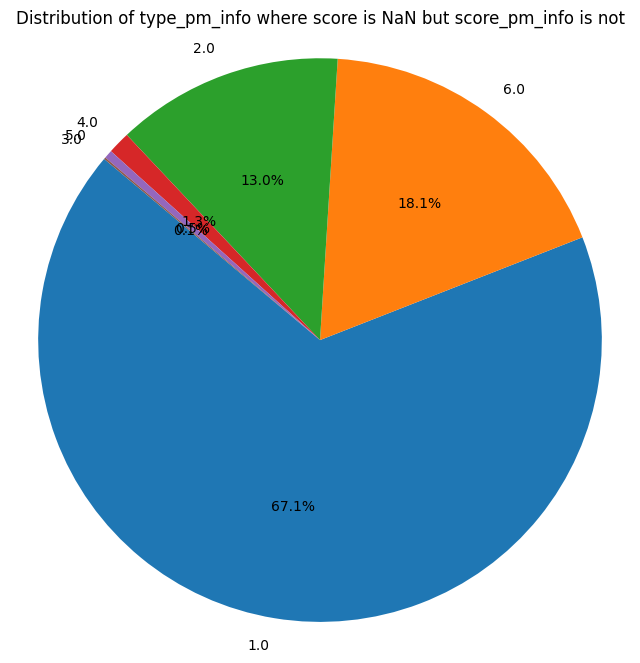

In [28]:
# Count values of 'type_pm_info'
type_counts = course_detail_problem_filtered['type_pm_info'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of type_pm_info where score is NaN but score_pm_info is not')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()

#### Điền khuyết khi score null và score_pm_info not null

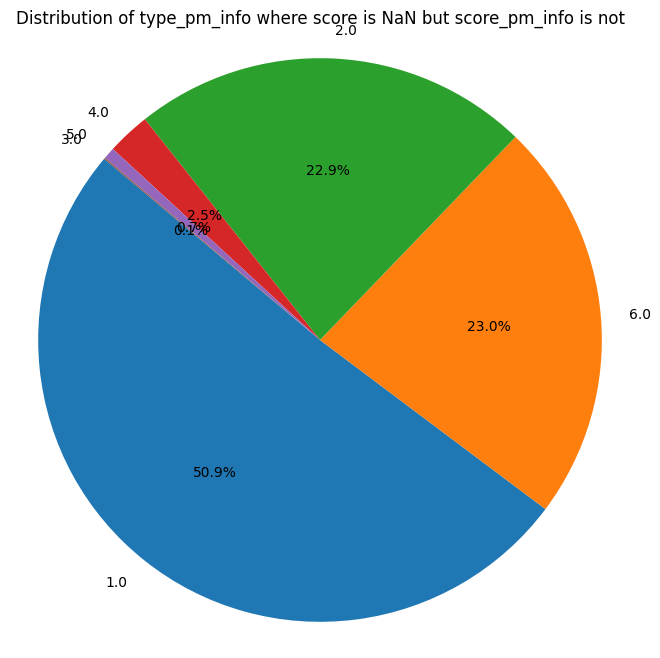

In [29]:
# Filter the data
filtered = course_detail_problem_filtered[
    (course_detail_problem_filtered['score'].isna()) &
    (course_detail_problem_filtered['score_pm_info'].notna())
]

# Count values of 'type_pm_info'
type_counts = filtered['type_pm_info'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of type_pm_info where score is NaN but score_pm_info is not')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()

In [30]:
mask = (
    course_detail_problem_filtered['score'].isna() &
    course_detail_problem_filtered['score_pm_info'].notna() &
    (course_detail_problem_filtered['is_correct'] == 1)
)

course_detail_problem_filtered.loc[mask, 'score'] = course_detail_problem_filtered.loc[mask, 'score_pm_info']

In [31]:
mask_incorrect = (
    course_detail_problem_filtered['score'].isna() &
    course_detail_problem_filtered['score_pm_info'].notna() &
    (course_detail_problem_filtered['is_correct'] == 0)
)
course_detail_problem_filtered.loc[mask_incorrect, 'score'] = 0

In [32]:
course_detail_problem_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11859330 entries, 0 to 11859329
Data columns (total 23 columns):
 #   Column               Dtype  
---  ------               -----  
 0   problem_id           object 
 1   user_id              object 
 2   is_correct           int64  
 3   attempts             int64  
 4   score                float64
 5   submit_time          object 
 6   exercise_id          object 
 7   course_id            object 
 8   title_pm_info        object 
 9   content_pm_info      object 
 10  option_pm_info       object 
 11  answer_pm_info       object 
 12  score_pm_info        float64
 13  type_pm_info         float64
 14  typetext_pm_info     object 
 15  location_pm_info     object 
 16  context_id_pm_info   object 
 17  exercise_id_pm_info  object 
 18  language_pm_info     object 
 19  user_enroll_time     object 
 20  submit_date          object 
 21  submit_clock_time    object 
 22  duration_days        int64  
dtypes: float64(3), int64(3), objec

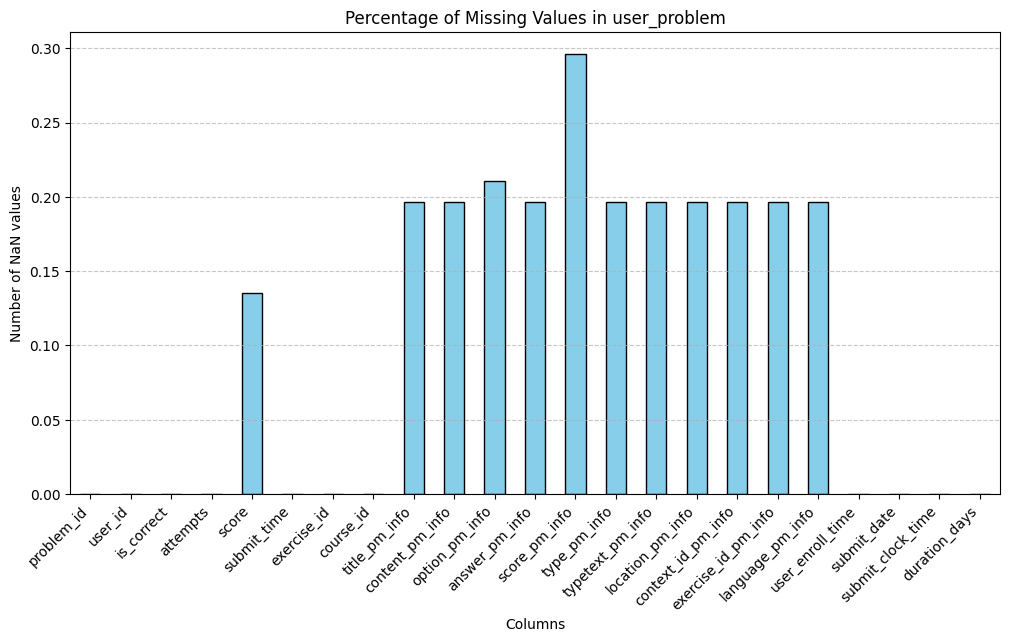

In [33]:
# Count NaN values per column
nan_counts = course_detail_problem_filtered.isna().mean()

# Plot bar chart
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize plot
plt.xlabel("Columns")
plt.ylabel("Number of NaN values")
plt.title("Percentage of Missing Values in user_problem")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [34]:
course_detail_problem_filtered[
    (course_detail_problem_filtered['score'].notna()) &
    (course_detail_problem_filtered['score_pm_info'].isna())
]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,problem_id,user_id,is_correct,attempts,score,submit_time,exercise_id,course_id,title_pm_info,content_pm_info,option_pm_info,answer_pm_info,score_pm_info,type_pm_info,typetext_pm_info,location_pm_info,context_id_pm_info,exercise_id_pm_info,language_pm_info,user_enroll_time,submit_date,submit_clock_time,duration_days
40,Pm_1742163,U_1000979,1,1,0.8,2020-05-19 14:36:28,Ex_1431545,C_947149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,2020-05-19,14:36:28,77
41,Pm_1742164,U_1000979,1,1,0.8,2020-05-19 14:36:10,Ex_1431545,C_947149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,2020-05-19,14:36:10,77
42,Pm_1742165,U_1000979,1,1,0.8,2020-05-19 14:36:05,Ex_1431545,C_947149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,2020-05-19,14:36:05,77
43,Pm_1742166,U_1000979,1,1,0.8,2020-05-19 14:36:15,Ex_1431545,C_947149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,2020-05-19,14:36:15,77
44,Pm_1742167,U_1000979,1,1,0.8,2020-05-19 14:35:25,Ex_1431545,C_947149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,2020-05-19,14:35:25,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11858504,Pm_1628138,U_9966221,0,1,0.0,2020-06-22 15:19:58,Ex_1366726,C_735342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-22,2020-06-22,15:19:58,31
11858505,Pm_1628139,U_9966221,1,1,1.0,2020-06-22 15:20:09,Ex_1366726,C_735342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-22,2020-06-22,15:20:09,31
11858506,Pm_1628140,U_9966221,0,1,0.0,2020-06-22 15:20:25,Ex_1366726,C_735342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-22,2020-06-22,15:20:25,31
11858507,Pm_1628141,U_9966221,1,1,1.0,2020-06-22 15:20:45,Ex_1366726,C_735342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-22,2020-06-22,15:20:45,31


#### Cập nhật score_pm_info khi có score 

In [35]:
course_detail_problem_filtered[
    (course_detail_problem_filtered['score'].notna()) &
    (course_detail_problem_filtered['score_pm_info'].isna())
].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1906684 entries, 40 to 11859310
Data columns (total 23 columns):
 #   Column               Dtype  
---  ------               -----  
 0   problem_id           object 
 1   user_id              object 
 2   is_correct           int64  
 3   attempts             int64  
 4   score                float64
 5   submit_time          object 
 6   exercise_id          object 
 7   course_id            object 
 8   title_pm_info        object 
 9   content_pm_info      object 
 10  option_pm_info       object 
 11  answer_pm_info       object 
 12  score_pm_info        float64
 13  type_pm_info         float64
 14  typetext_pm_info     object 
 15  location_pm_info     object 
 16  context_id_pm_info   object 
 17  exercise_id_pm_info  object 
 18  language_pm_info     object 
 19  user_enroll_time     object 
 20  submit_date          object 
 21  submit_clock_time    object 
 22  duration_days        int64  
dtypes: float64(3), int64(3), object(17)

In [36]:
course_detail_problem_filtered[
    course_detail_problem_filtered['score'].notnull() &
    course_detail_problem_filtered['score_pm_info'].isna()
].isnull().sum()

problem_id                   0
user_id                      0
is_correct                   0
attempts                     0
score                        0
submit_time                  0
exercise_id                  0
course_id                    0
title_pm_info          1873262
content_pm_info        1873262
option_pm_info         1884181
answer_pm_info         1873262
score_pm_info          1906684
type_pm_info           1873262
typetext_pm_info       1873262
location_pm_info       1873262
context_id_pm_info     1873262
exercise_id_pm_info    1873262
language_pm_info       1873262
user_enroll_time             0
submit_date                  0
submit_clock_time            0
duration_days                0
dtype: int64

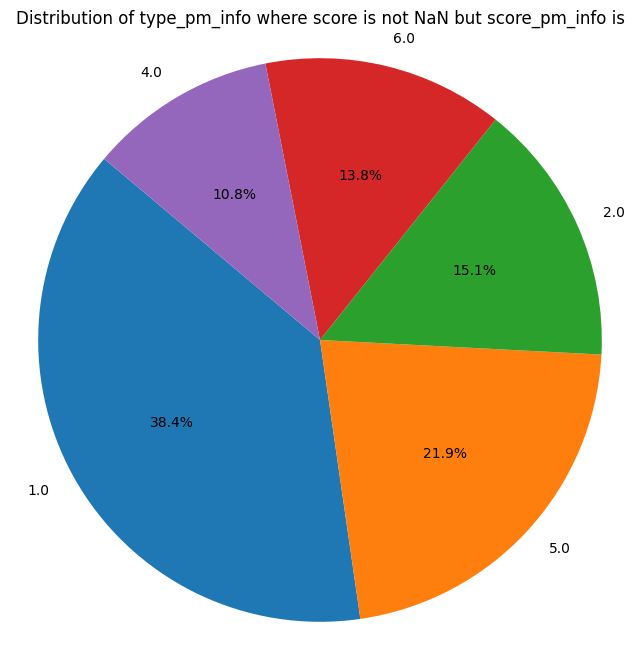

In [37]:
# Filter the data
filtered = course_detail_problem_filtered[
    course_detail_problem_filtered['score'].notnull() &
    course_detail_problem_filtered['score_pm_info'].isna()
]
# Count values of 'type_pm_info'
type_counts = filtered['type_pm_info'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of type_pm_info where score is not NaN but score_pm_info is')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()

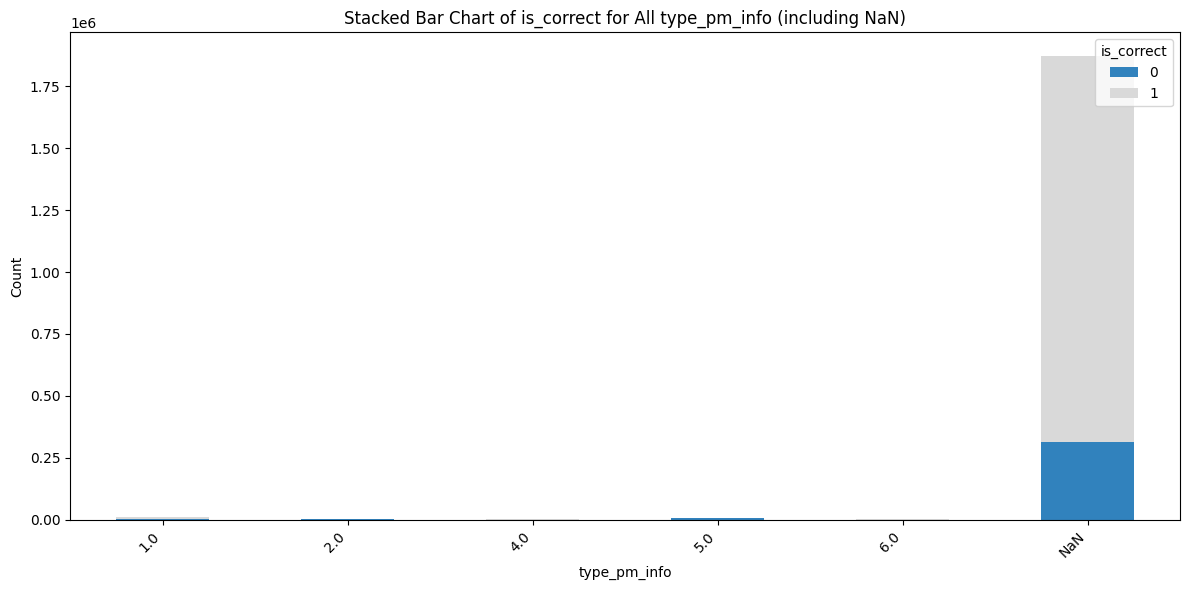

In [38]:
# Filter the data (do NOT drop NaNs in type_pm_info)
filtered = course_detail_problem_filtered[
    course_detail_problem_filtered['score'].notnull() &
    course_detail_problem_filtered['score_pm_info'].isna()
].copy()

# Replace NaN with a label for grouping and plotting
filtered['type_pm_info'] = filtered['type_pm_info'].fillna('NaN')

# Create a count table by is_correct and type_pm_info
stacked_counts = filtered.groupby(['type_pm_info', 'is_correct']).size().unstack(fill_value=0)

# Plot the stacked bar chart
stacked_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')
plt.title('Stacked Bar Chart of is_correct for All type_pm_info (including NaN)')
plt.xlabel('type_pm_info')
plt.ylabel('Count')
plt.legend(title='is_correct', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


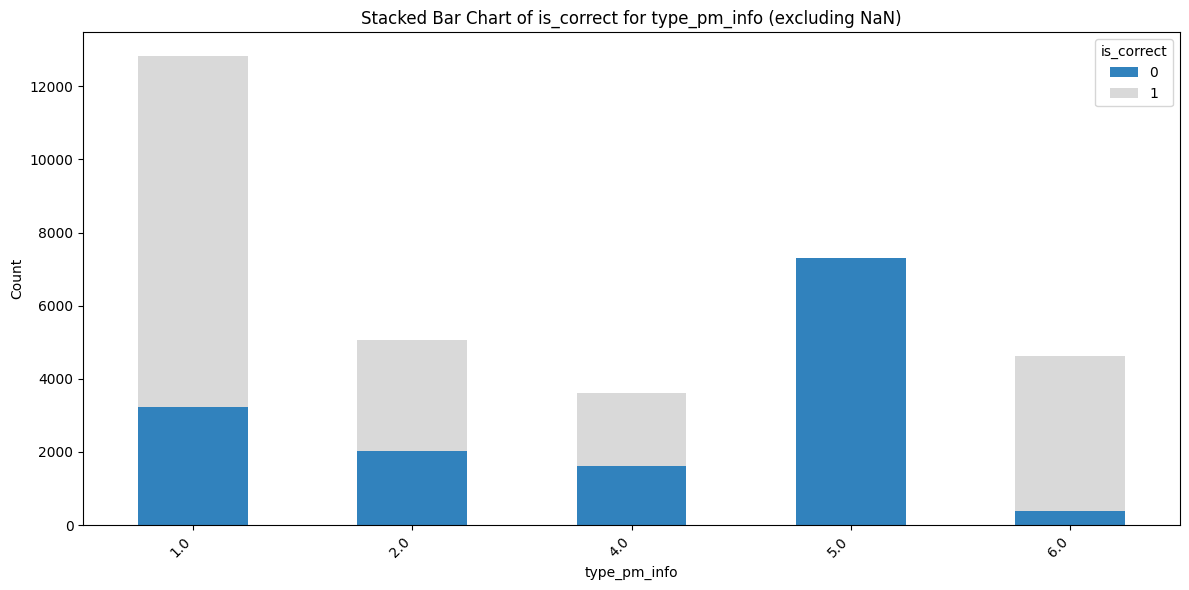

In [39]:
# Filter the data (exclude NaNs in type_pm_info)
filtered = course_detail_problem_filtered[
    course_detail_problem_filtered['score'].notnull() &
    course_detail_problem_filtered['score_pm_info'].isna()
]

# Exclude rows where 'type_pm_info' is NaN
filtered = filtered[filtered['type_pm_info'].notna()]

# Create a count table by is_correct and type_pm_info
stacked_counts = filtered.groupby(['type_pm_info', 'is_correct']).size().unstack(fill_value=0)

# Plot the stacked bar chart
stacked_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')
plt.title('Stacked Bar Chart of is_correct for type_pm_info (excluding NaN)')
plt.xlabel('type_pm_info')
plt.ylabel('Count')
plt.legend(title='is_correct', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Tìm score cao nhất với câu hỏi để điền vào score_pm_info

In [40]:
max_score_pm_info = filtered[['problem_id', 'score_pm_info', 'type_pm_info']].drop_duplicates()
max_score_pm_info

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,problem_id,score_pm_info,type_pm_info
5809,Pm_6938688,NaN,1.0
5810,Pm_6938689,NaN,1.0
5811,Pm_6938690,NaN,6.0
8327,Pm_6987900,NaN,1.0
8328,Pm_6987901,NaN,1.0
...,...,...,...
11821802,Pm_7059614,NaN,1.0
11821803,Pm_7059615,NaN,1.0
11821804,Pm_7059616,NaN,1.0
11821805,Pm_7059617,NaN,1.0


In [41]:
# Group by problem_id and get the maximum score for each problem_id
max_scores = course_detail_problem_filtered.groupby('problem_id')['score'].max().reset_index()

In [42]:
max_scores

,problem_id,score
0,Pm_100561,1.0
1,Pm_100562,1.0
2,Pm_100563,0.0
3,Pm_100564,2.0
4,Pm_100565,2.0
...,...,...
94470,Pm_97653,1.0
94471,Pm_97654,2.0
94472,Pm_97655,2.0
94473,Pm_97656,2.0


In [43]:
max_score_pm_info.isna().sum()

problem_id          0
score_pm_info    1818
type_pm_info        0
dtype: int64

In [44]:
max_score_pm_info = max_score_pm_info.merge(max_scores, on='problem_id', how='left')

In [45]:
max_score_pm_info.isna().sum()

problem_id          0
score_pm_info    1818
type_pm_info        0
score               0
dtype: int64

In [46]:
max_score_pm_info = max_scores.rename(columns={'score': 'max_score'})  # Rename 'score' to 'max_score'

# Step 2: Merge max_score_pm_info into course_detail_problem_filtered on 'problem_id'
course_detail_problem_filtered = course_detail_problem_filtered.merge(max_score_pm_info[['problem_id', 'max_score']], on='problem_id', how='left')
course_detail_problem_filtered.isna().sum()

problem_id                   0
user_id                      0
is_correct                   0
attempts                     0
score                  1604430
submit_time                  0
exercise_id                  0
course_id                    0
title_pm_info          2329192
content_pm_info        2329192
option_pm_info         2497294
answer_pm_info         2329192
score_pm_info          3511114
type_pm_info           2329192
typetext_pm_info       2329192
location_pm_info       2329192
context_id_pm_info     2329192
exercise_id_pm_info    2329192
language_pm_info       2329192
user_enroll_time             0
submit_date                  0
submit_clock_time            0
duration_days                0
max_score              1446938
dtype: int64

In [47]:
course_detail_problem_filtered[
    course_detail_problem_filtered['score'].notnull() &
    course_detail_problem_filtered['score_pm_info'].isna()
]


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,problem_id,user_id,is_correct,attempts,score,submit_time,exercise_id,course_id,title_pm_info,content_pm_info,option_pm_info,answer_pm_info,score_pm_info,type_pm_info,typetext_pm_info,location_pm_info,context_id_pm_info,exercise_id_pm_info,language_pm_info,user_enroll_time,submit_date,submit_clock_time,duration_days,max_score
40,Pm_1742163,U_1000979,1,1,0.8,2020-05-19 14:36:28,Ex_1431545,C_947149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,2020-05-19,14:36:28,77,0.8
41,Pm_1742164,U_1000979,1,1,0.8,2020-05-19 14:36:10,Ex_1431545,C_947149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,2020-05-19,14:36:10,77,0.8
42,Pm_1742165,U_1000979,1,1,0.8,2020-05-19 14:36:05,Ex_1431545,C_947149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,2020-05-19,14:36:05,77,0.8
43,Pm_1742166,U_1000979,1,1,0.8,2020-05-19 14:36:15,Ex_1431545,C_947149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,2020-05-19,14:36:15,77,0.8
44,Pm_1742167,U_1000979,1,1,0.8,2020-05-19 14:35:25,Ex_1431545,C_947149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,2020-05-19,14:35:25,77,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11858504,Pm_1628138,U_9966221,0,1,0.0,2020-06-22 15:19:58,Ex_1366726,C_735342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-22,2020-06-22,15:19:58,31,1.0
11858505,Pm_1628139,U_9966221,1,1,1.0,2020-06-22 15:20:09,Ex_1366726,C_735342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-22,2020-06-22,15:20:09,31,1.0
11858506,Pm_1628140,U_9966221,0,1,0.0,2020-06-22 15:20:25,Ex_1366726,C_735342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-22,2020-06-22,15:20:25,31,1.0
11858507,Pm_1628141,U_9966221,1,1,1.0,2020-06-22 15:20:45,Ex_1366726,C_735342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-22,2020-06-22,15:20:45,31,1.0


In [48]:
# Step 3: Fill 'score_pm_info' with the 'max_score' from max_score_pm_info where 'score_pm_info' is NaN
course_detail_problem_filtered['score_pm_info'] = course_detail_problem_filtered['score_pm_info'].fillna(course_detail_problem_filtered['max_score'])

In [49]:
# Step 4: Drop the 'max_score' column since it is no longer needed
course_detail_problem_filtered = course_detail_problem_filtered.drop(columns=['max_score'])

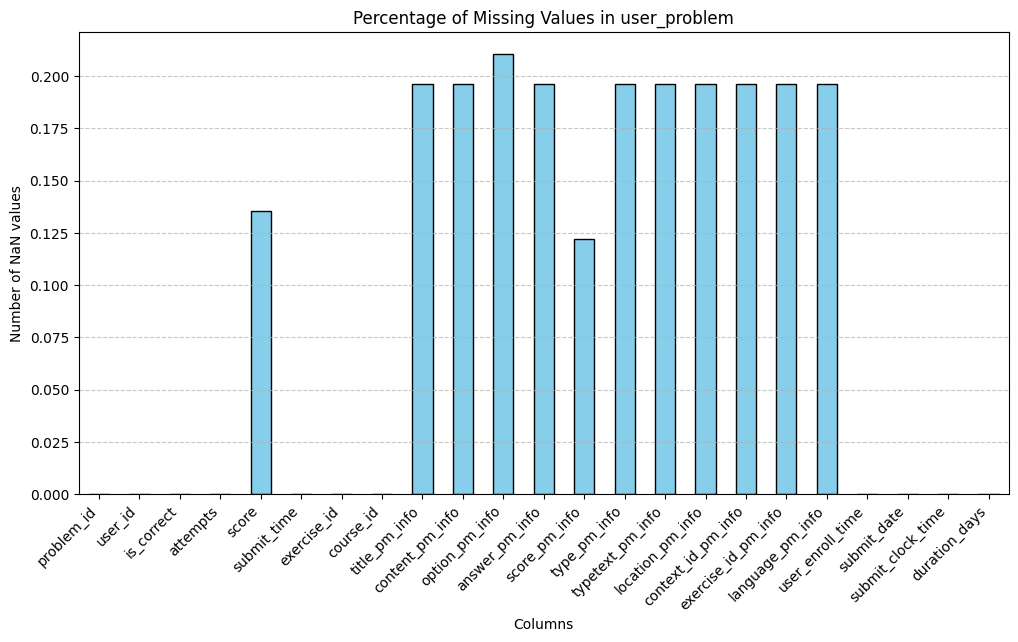

In [50]:
# Count NaN values per column
nan_counts = course_detail_problem_filtered.isna().mean()

# Plot bar chart
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize plot
plt.xlabel("Columns")
plt.ylabel("Number of NaN values")
plt.title("Percentage of Missing Values in user_problem")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

#### Điền khuyết score dựa vào score_pm_info đã được cập nhật 

In [51]:
course_detail_problem_filtered[
    course_detail_problem_filtered['score'].isna() &
    course_detail_problem_filtered['score_pm_info'].notna()]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,problem_id,user_id,is_correct,attempts,score,submit_time,exercise_id,course_id,title_pm_info,content_pm_info,option_pm_info,answer_pm_info,score_pm_info,type_pm_info,typetext_pm_info,location_pm_info,context_id_pm_info,exercise_id_pm_info,language_pm_info,user_enroll_time,submit_date,submit_clock_time,duration_days
1584,Pm_3331807,U_1002784,1,1,NaN,2020-11-11 19:50:45,Ex_4411759,C_1756056,Unit 5 Social Issues--4. Topic and Text,"According to Guanda, what is the “sociological...",{'A': 'It refers to a wider sight of people ov...,"[""A""]",1.0,1.0,单选题,5.4.3,"[6704365, 6704366]",Ex_4411759,English,2020-10-13,2020-11-11,19:50:45,29
1585,Pm_3331808,U_1002784,1,1,NaN,2020-11-11 19:50:49,Ex_4411759,C_1756056,Unit 5 Social Issues--4. Topic and Text,What does “lot” refer to in this text?,"{'A': 'a group of', 'B': 'a large number of', ...","[""C""]",1.0,1.0,单选题,5.4.3,"[6704365, 6704366]",Ex_4411759,English,2020-10-13,2020-11-11,19:50:49,29
1586,Pm_3331809,U_1002784,1,1,NaN,2020-11-11 19:50:53,Ex_4411759,C_1756056,Unit 5 Social Issues--4. Topic and Text,Which one is NOT right about “personal unworth...,{'A': 'a person cannot feel his own contributi...,"[""D""]",1.0,1.0,单选题,5.4.3,"[6704365, 6704366]",Ex_4411759,English,2020-10-13,2020-11-11,19:50:53,29
1587,Pm_3331810,U_1002784,1,1,NaN,2020-11-11 19:50:55,Ex_4411759,C_1756056,Unit 5 Social Issues--4. Topic and Text,What does “marginality” refers to?,{'A': 'people living far away from the majorit...,"[""A""]",1.0,1.0,单选题,5.4.3,"[6704365, 6704366]",Ex_4411759,English,2020-10-13,2020-11-11,19:50:55,29
1611,Pm_3331834,U_1002784,1,1,NaN,2020-11-11 19:52:53,Ex_4411767,C_1756056,Unit 5 Social Issues--8. Student Research,Which one in the following is NOT the argument...,"{'A': 'Animal testing is cruel but humane.', '...","[""A""]",1.0,1.0,单选题,5.8.2,[6704374],Ex_4411767,English,2020-10-13,2020-11-11,19:52:53,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11859063,Pm_6987945,U_997506,1,1,NaN,2020-11-19 15:00:27,Ex_7083080,C_2095102,第4单元作业（共10个单选题）,方阵A酉相似与对角矩阵的充分必要条件是(),"{'A': '方阵A是正规矩阵', 'B': '方阵A是正交矩阵', 'C': '方阵A是酉...","[""A""]",0.0,1.0,单选题,3.2,"[7083078, 7083079]",Ex_7083080,Chinese,2020-11-13,2020-11-19,15:00:27,6
11859064,Pm_6987946,U_997506,1,1,NaN,2020-11-19 15:00:33,Ex_7083080,C_2095102,第4单元作业（共10个单选题）,"设有向量 ,下列关于内积性质的表述中错误的是()","{'A': '', 'B': '', 'C': '', 'D': ''}","[""A""]",1.0,1.0,单选题,3.2,"[7083078, 7083079]",Ex_7083080,Chinese,2020-11-13,2020-11-19,15:00:33,6
11859065,Pm_6987947,U_997506,1,1,NaN,2020-11-19 15:00:54,Ex_7083080,C_2095102,第4单元作业（共10个单选题）,"已知A为4阶方阵, 的特征值为1,2,4,0,则rankA为()","{'A': '1', 'B': '2', 'C': '3', 'D': '4'}","[""C""]",1.0,1.0,单选题,3.2,"[7083078, 7083079]",Ex_7083080,Chinese,2020-11-13,2020-11-19,15:00:54,6
11859066,Pm_6987948,U_997506,1,1,NaN,2020-11-19 14:55:45,Ex_7083080,C_2095102,第4单元作业（共10个单选题）,"已知向量 ,则 是()","{'A': '', 'B': '', 'C': '', 'D': ''}","[""C""]",1.0,1.0,单选题,3.2,"[7083078, 7083079]",Ex_7083080,Chinese,2020-11-13,2020-11-19,14:55:45,6


In [52]:
mask = (
    course_detail_problem_filtered['score'].isna() &
    course_detail_problem_filtered['score_pm_info'].notna() &
    (course_detail_problem_filtered['is_correct'] == 1)
)

course_detail_problem_filtered.loc[mask, 'score'] = course_detail_problem_filtered.loc[mask, 'score_pm_info']

In [53]:
mask_incorrect = (
    course_detail_problem_filtered['score'].isna() &
    course_detail_problem_filtered['score_pm_info'].notna() &
    (course_detail_problem_filtered['is_correct'] == 0)
)
course_detail_problem_filtered.loc[mask_incorrect, 'score'] = 0

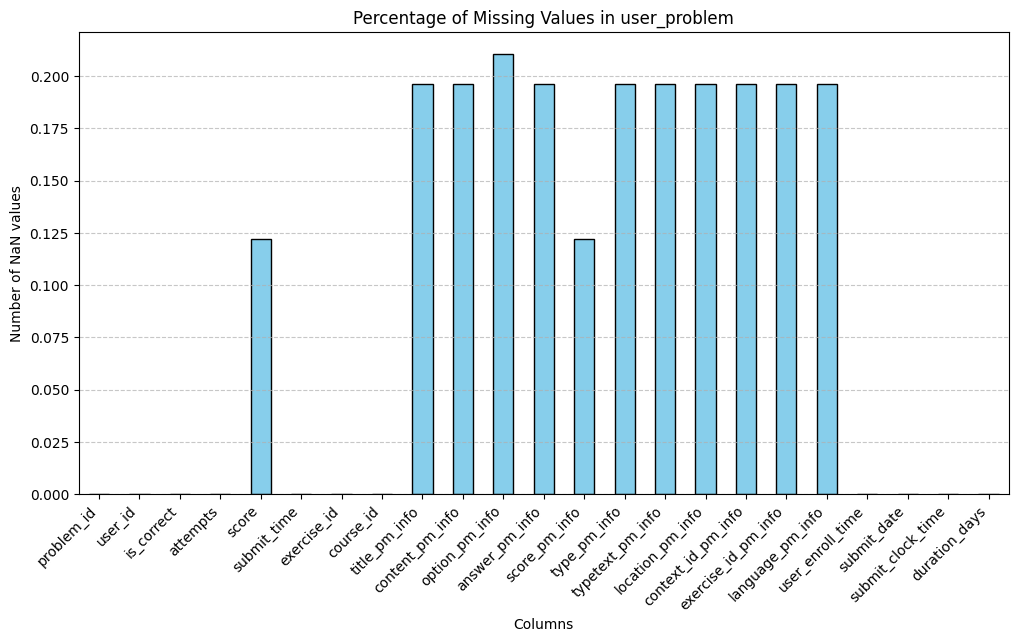

In [54]:
# Count NaN values per column
nan_counts = course_detail_problem_filtered.isna().mean()

# Plot bar chart
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize plot
plt.xlabel("Columns")
plt.ylabel("Number of NaN values")
plt.title("Percentage of Missing Values in user_problem")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

### Điều khuyết score khi có thông tin của câu hỏi

In [55]:
course_detail_problem_filtered[
    course_detail_problem_filtered['score'].isna() &
    course_detail_problem_filtered['score_pm_info'].isna() &
    course_detail_problem_filtered['type_pm_info'].notna()
]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,problem_id,user_id,is_correct,attempts,score,submit_time,exercise_id,course_id,title_pm_info,content_pm_info,option_pm_info,answer_pm_info,score_pm_info,type_pm_info,typetext_pm_info,location_pm_info,context_id_pm_info,exercise_id_pm_info,language_pm_info,user_enroll_time,submit_date,submit_clock_time,duration_days
1798,Pm_7630334,U_1002784,0,1,NaN,2020-10-27 19:38:38,Ex_4411739,C_1756056,Unit 4 Man and Nature--6. Academic Writin,Choose the most appropriate answer by completi...,"{'A': 'something may happen or be true', 'B': ...","[""A""]",NaN,1.0,单选题,4.4.2,[6704347],Ex_4411739,English,2020-10-13,2020-10-27,19:38:38,14
1799,Pm_7630335,U_1002784,1,1,NaN,2020-10-27 19:40:18,Ex_4411739,C_1756056,Unit 4 Man and Nature--6. Academic Writin,“Quip” has the meaning of _______ in the text.,"{'A': 'equip', 'B': 'making a humorous remark'...","[""B""]",NaN,1.0,单选题,4.4.2,[6704347],Ex_4411739,English,2020-10-13,2020-10-27,19:40:18,14
1800,Pm_7630336,U_1002784,1,1,NaN,2020-10-27 19:41:25,Ex_4411739,C_1756056,Unit 4 Man and Nature--6. Academic Writin,“In the dark” means _______.,"{'A': 'in the darkness', 'B': 'in danger', 'C'...","[""C""]",NaN,1.0,单选题,4.4.2,[6704347],Ex_4411739,English,2020-10-13,2020-10-27,19:41:25,14
1801,Pm_7630337,U_1002784,1,1,NaN,2020-10-27 19:42:42,Ex_4411739,C_1756056,Unit 4 Man and Nature--6. Academic Writin,What does “the odds” imply?,"{'A': 'expectation', 'B': 'prospect', 'C': 'ex...","[""D""]",NaN,1.0,单选题,4.4.2,[6704347],Ex_4411739,English,2020-10-13,2020-10-27,19:42:42,14
1802,Pm_7630338,U_1002784,0,1,NaN,2020-10-27 19:45:21,Ex_4411739,C_1756056,Unit 4 Man and Nature--6. Academic Writin,“Staggeringly” refers to something being_______.,"{'A': 'striving', 'B': 'stopping', 'C': 'surpr...","[""C""]",NaN,1.0,单选题,4.4.2,[6704347],Ex_4411739,English,2020-10-13,2020-10-27,19:45:21,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11859219,Pm_7514365,U_997542,1,1,NaN,2020-10-10 21:18:30,Ex_7604461,C_2066096,第五章 课后习题,（5-25）工程师职业准入制度包括( )。,"{'A': '高校教育及专业评估认证', 'B': '职业实践', 'C': '资格考试',...","[""A"", ""B"", ""C"", ""D""]",NaN,2.0,多选题,5.3,[7062031],Ex_7604461,Chinese,2020-09-15,2020-10-10,21:18:30,25
11859220,Pm_7514366,U_997542,1,4,NaN,2020-10-10 21:18:51,Ex_7604461,C_2066096,第五章 课后习题,（5-43）工程职业伦理章程以他律的方式检视、评估工程师是否在工程生活中是否尽职尽责。其责任...,"{'A': '义务——责任', 'B': '过失——责任', 'C': '角色责任', 'D...","[""A"", ""B"", ""C""]",NaN,2.0,多选题,5.3,[7062031],Ex_7604461,Chinese,2020-09-15,2020-10-10,21:18:51,25
11859221,Pm_7514367,U_997542,1,1,NaN,2020-10-10 21:19:00,Ex_7604461,C_2066096,第五章 课后习题,"（5-41）作为职业人员,工程师享有下列八项权利,包括( )。","{'A': '使用注册职业名称', 'B': '以在规定范围内从事执业活动', 'C': '...","[""A"", ""B"", ""C"", ""D""]",NaN,2.0,多选题,5.3,[7062031],Ex_7604461,Chinese,2020-09-15,2020-10-10,21:19:00,25
11859222,Pm_7514368,U_997542,1,3,NaN,2020-10-10 21:19:19,Ex_7604461,C_2066096,第五章 课后习题,"（5-40）马丁和辛津格认为,工程师举报“不是医治组织的最好的方法,它仅仅是一种最后的诉求”...","{'A': '发现问题迅速表达反对意见', 'B': '以通达的、体贴的方式反映情况', '...","[""A"", ""B"", ""C"", ""D""]",NaN,2.0,多选题,5.3,[7062031],Ex_7604461,Chinese,2020-09-15,2020-10-10,21:19:19,25


#### Câu hỏi loại 1 chọn số điểm chiếm đa số là 1

In [56]:
course_detail_problem_filtered[course_detail_problem_filtered['type_pm_info']==1].describe()

,is_correct,attempts,score,score_pm_info,type_pm_info,duration_days
count,6.390044e+06,6.390044e+06,5.662256e+06,5.662256e+06,6390044.0,6.390044e+06
mean,8.663529e-01,1.076740e+00,9.444549e-01,1.103254e+00,1.0,3.193803e+01
std,3.402728e-01,3.333650e-01,8.485035e-01,8.192702e-01,0.0,4.500292e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,3.000000e+00
50%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.400000e+01
75%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,4.200000e+01
max,1.000000e+00,1.640000e+02,1.000000e+02,1.000000e+02,1.0,4.400000e+02


#### Câu hỏi loại 2 có số điểm chiếm đa số là 2

In [57]:
course_detail_problem_filtered[course_detail_problem_filtered['type_pm_info']==2].describe()

,is_correct,attempts,score,score_pm_info,type_pm_info,duration_days
count,1.241172e+06,1.241172e+06,961244.000000,961244.000000,1241172.0,1.241172e+06
mean,7.903699e-01,1.166091e+00,1.658937,2.170892,2.0,4.181887e+01
std,4.070448e-01,1.118625e+00,1.224439,0.943266,0.0,5.016579e+01
min,0.000000e+00,1.000000e+00,0.000000,0.000000,2.0,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000,2.000000,2.0,5.000000e+00
50%,1.000000e+00,1.000000e+00,2.000000,2.000000,2.0,2.400000e+01
75%,1.000000e+00,1.000000e+00,2.000000,2.000000,2.0,6.700000e+01
max,1.000000e+00,1.900000e+02,30.000000,30.000000,2.0,4.310000e+02


### Câu hỏi loại 6 có số điểm chiếm đa số là 1

In [58]:
course_detail_problem_filtered[course_detail_problem_filtered['type_pm_info']==6].describe()

,is_correct,attempts,score,score_pm_info,type_pm_info,duration_days
count,1.721083e+06,1.721083e+06,1.663007e+06,1.663007e+06,1721083.0,1.721083e+06
mean,8.633558e-01,1.023591e+00,9.797470e-01,1.138544e+00,6.0,5.228861e+01
std,3.434714e-01,1.574642e-01,8.321489e-01,7.977301e-01,0.0,5.575717e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.0,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.0,8.000000e+00
50%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.0,3.800000e+01
75%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.0,8.100000e+01
max,1.000000e+00,9.000000e+00,4.000000e+01,4.000000e+01,6.0,4.310000e+02


### Câu hỏi loại 4 có số điểm chiếm đa số là 1

In [59]:
course_detail_problem_filtered[course_detail_problem_filtered['type_pm_info']==4].describe()

,is_correct,attempts,score,score_pm_info,type_pm_info,duration_days
count,122400.000000,122400.000000,116578.000000,116578.000000,122400.0,122400.000000
mean,0.647884,1.048627,1.390828,2.173373,4.0,58.815915
std,0.477632,0.491154,2.979655,4.065219,0.0,55.533660
min,0.000000,1.000000,0.000000,0.000000,4.0,0.000000
25%,0.000000,1.000000,0.000000,1.000000,4.0,12.000000
50%,1.000000,1.000000,1.000000,1.000000,4.0,52.000000
75%,1.000000,1.000000,2.000000,2.000000,4.0,83.000000
max,1.000000,47.000000,60.000000,60.000000,4.0,440.000000


### Câu hỏi loại 5 có số điểm chiếm đa số là 10

In [60]:
course_detail_problem_filtered[course_detail_problem_filtered['type_pm_info']==5].describe()

,is_correct,attempts,score,score_pm_info,type_pm_info,duration_days
count,45702.0,45702.000000,38681.000000,38681.000000,45702.0,45702.000000
mean,0.0,1.114349,2.101362,8.884271,5.0,46.868824
std,0.0,0.462232,5.493055,6.140425,0.0,45.268729
min,0.0,1.000000,-1.000000,-1.000000,5.0,0.000000
25%,0.0,1.000000,-1.000000,10.000000,5.0,7.000000
50%,0.0,1.000000,0.000000,10.000000,5.0,41.000000
75%,0.0,1.000000,7.000000,10.000000,5.0,69.000000
max,0.0,16.000000,90.000000,100.000000,5.0,418.000000


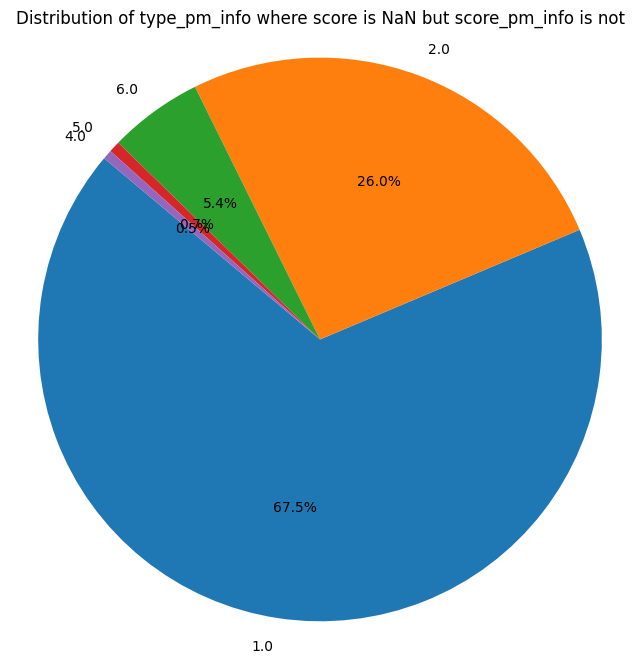

In [61]:
# Filter the data
filtered = course_detail_problem_filtered[
    course_detail_problem_filtered['score'].isna() &
    course_detail_problem_filtered['score_pm_info'].isna() &
    course_detail_problem_filtered['type_pm_info'].notna()
]

# Count values of 'type_pm_info'
type_counts = filtered['type_pm_info'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of type_pm_info where score is NaN but score_pm_info is not')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()

In [62]:
mask = (
    course_detail_problem_filtered['score_pm_info'].isna() &
    (
        (course_detail_problem_filtered['type_pm_info'] == 1) |
        (course_detail_problem_filtered['type_pm_info'] == 4) |
        (course_detail_problem_filtered['type_pm_info'] == 6)
    )
)

course_detail_problem_filtered.loc[mask, 'score_pm_info'] = 1


In [63]:
mask_correct = (
    course_detail_problem_filtered['score_pm_info'].isna() &
    (
        (course_detail_problem_filtered['type_pm_info'] == 1) |
        (course_detail_problem_filtered['type_pm_info'] == 4) |
        (course_detail_problem_filtered['type_pm_info'] == 6)
    ) &
    (course_detail_problem_filtered['is_correct'] == 1)
)

course_detail_problem_filtered.loc[mask_correct, 'score'] = 1

In [64]:
mask_incorrect = (
    course_detail_problem_filtered['score_pm_info'].isna() &
    (
        (course_detail_problem_filtered['type_pm_info'] == 1) |
        (course_detail_problem_filtered['type_pm_info'] == 4) |
        (course_detail_problem_filtered['type_pm_info'] == 6)
    ) &
    (course_detail_problem_filtered['is_correct'] == 0)
)

course_detail_problem_filtered.loc[mask_incorrect, 'score'] = 0

In [65]:
mask = (
    course_detail_problem_filtered['score_pm_info'].isna() &
    (
        (course_detail_problem_filtered['type_pm_info'] == 2) 
    )
)

course_detail_problem_filtered.loc[mask, 'score_pm_info'] = 2


In [66]:
mask_correct = (
    course_detail_problem_filtered['score_pm_info'].isna() &
    (
        (course_detail_problem_filtered['type_pm_info'] == 2)
    ) &
    (course_detail_problem_filtered['is_correct'] == 1)
)

course_detail_problem_filtered.loc[mask_correct, 'score'] = 2

In [67]:
mask_incorrect = (
    course_detail_problem_filtered['score_pm_info'].isna() &
    (
        (course_detail_problem_filtered['type_pm_info'] == 2) 
    ) &
    (course_detail_problem_filtered['is_correct'] == 0)
)

course_detail_problem_filtered.loc[mask_incorrect, 'score'] = 0

In [68]:
mask = (
    course_detail_problem_filtered['score_pm_info'].isna() &
    (
        (course_detail_problem_filtered['type_pm_info'] == 5) 
    )
)

course_detail_problem_filtered.loc[mask, 'score_pm_info'] = 10

In [69]:
mask_correct = (
    course_detail_problem_filtered['score_pm_info'].isna() &
    (
        (course_detail_problem_filtered['type_pm_info'] == 5)
    ) &
    (course_detail_problem_filtered['is_correct'] == 1)
)

course_detail_problem_filtered.loc[mask_correct, 'score'] = 10

In [70]:
mask_incorrect = (
    course_detail_problem_filtered['score_pm_info'].isna() &
    (
        (course_detail_problem_filtered['type_pm_info'] == 5) 
    ) &
    (course_detail_problem_filtered['is_correct'] == 0)
)

course_detail_problem_filtered.loc[mask_incorrect, 'score'] = 0

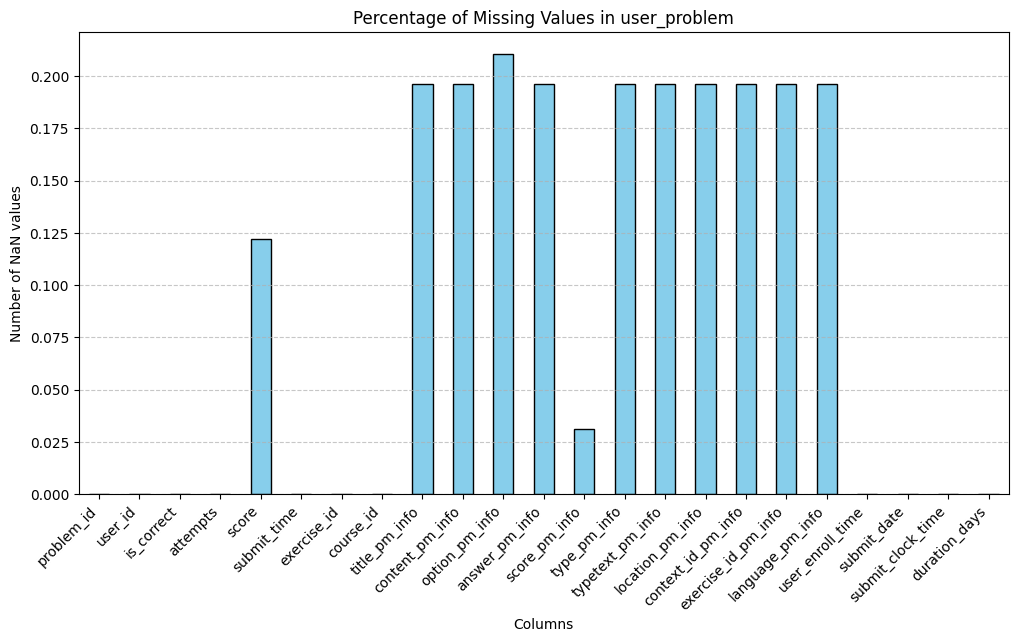

In [71]:
# Count NaN values per column
nan_counts = course_detail_problem_filtered.isna().mean()

# Plot bar chart
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize plot
plt.xlabel("Columns")
plt.ylabel("Number of NaN values")
plt.title("Percentage of Missing Values in user_problem")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [72]:
course_detail_problem_filtered[
    course_detail_problem_filtered['score'].isna() &
    course_detail_problem_filtered['score_pm_info'].notna()
]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,problem_id,user_id,is_correct,attempts,score,submit_time,exercise_id,course_id,title_pm_info,content_pm_info,option_pm_info,answer_pm_info,score_pm_info,type_pm_info,typetext_pm_info,location_pm_info,context_id_pm_info,exercise_id_pm_info,language_pm_info,user_enroll_time,submit_date,submit_clock_time,duration_days
1798,Pm_7630334,U_1002784,0,1,NaN,2020-10-27 19:38:38,Ex_4411739,C_1756056,Unit 4 Man and Nature--6. Academic Writin,Choose the most appropriate answer by completi...,"{'A': 'something may happen or be true', 'B': ...","[""A""]",1.0,1.0,单选题,4.4.2,[6704347],Ex_4411739,English,2020-10-13,2020-10-27,19:38:38,14
1799,Pm_7630335,U_1002784,1,1,NaN,2020-10-27 19:40:18,Ex_4411739,C_1756056,Unit 4 Man and Nature--6. Academic Writin,“Quip” has the meaning of _______ in the text.,"{'A': 'equip', 'B': 'making a humorous remark'...","[""B""]",1.0,1.0,单选题,4.4.2,[6704347],Ex_4411739,English,2020-10-13,2020-10-27,19:40:18,14
1800,Pm_7630336,U_1002784,1,1,NaN,2020-10-27 19:41:25,Ex_4411739,C_1756056,Unit 4 Man and Nature--6. Academic Writin,“In the dark” means _______.,"{'A': 'in the darkness', 'B': 'in danger', 'C'...","[""C""]",1.0,1.0,单选题,4.4.2,[6704347],Ex_4411739,English,2020-10-13,2020-10-27,19:41:25,14
1801,Pm_7630337,U_1002784,1,1,NaN,2020-10-27 19:42:42,Ex_4411739,C_1756056,Unit 4 Man and Nature--6. Academic Writin,What does “the odds” imply?,"{'A': 'expectation', 'B': 'prospect', 'C': 'ex...","[""D""]",1.0,1.0,单选题,4.4.2,[6704347],Ex_4411739,English,2020-10-13,2020-10-27,19:42:42,14
1802,Pm_7630338,U_1002784,0,1,NaN,2020-10-27 19:45:21,Ex_4411739,C_1756056,Unit 4 Man and Nature--6. Academic Writin,“Staggeringly” refers to something being_______.,"{'A': 'striving', 'B': 'stopping', 'C': 'surpr...","[""C""]",1.0,1.0,单选题,4.4.2,[6704347],Ex_4411739,English,2020-10-13,2020-10-27,19:45:21,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11859219,Pm_7514365,U_997542,1,1,NaN,2020-10-10 21:18:30,Ex_7604461,C_2066096,第五章 课后习题,（5-25）工程师职业准入制度包括( )。,"{'A': '高校教育及专业评估认证', 'B': '职业实践', 'C': '资格考试',...","[""A"", ""B"", ""C"", ""D""]",2.0,2.0,多选题,5.3,[7062031],Ex_7604461,Chinese,2020-09-15,2020-10-10,21:18:30,25
11859220,Pm_7514366,U_997542,1,4,NaN,2020-10-10 21:18:51,Ex_7604461,C_2066096,第五章 课后习题,（5-43）工程职业伦理章程以他律的方式检视、评估工程师是否在工程生活中是否尽职尽责。其责任...,"{'A': '义务——责任', 'B': '过失——责任', 'C': '角色责任', 'D...","[""A"", ""B"", ""C""]",2.0,2.0,多选题,5.3,[7062031],Ex_7604461,Chinese,2020-09-15,2020-10-10,21:18:51,25
11859221,Pm_7514367,U_997542,1,1,NaN,2020-10-10 21:19:00,Ex_7604461,C_2066096,第五章 课后习题,"（5-41）作为职业人员,工程师享有下列八项权利,包括( )。","{'A': '使用注册职业名称', 'B': '以在规定范围内从事执业活动', 'C': '...","[""A"", ""B"", ""C"", ""D""]",2.0,2.0,多选题,5.3,[7062031],Ex_7604461,Chinese,2020-09-15,2020-10-10,21:19:00,25
11859222,Pm_7514368,U_997542,1,3,NaN,2020-10-10 21:19:19,Ex_7604461,C_2066096,第五章 课后习题,"（5-40）马丁和辛津格认为,工程师举报“不是医治组织的最好的方法,它仅仅是一种最后的诉求”...","{'A': '发现问题迅速表达反对意见', 'B': '以通达的、体贴的方式反映情况', '...","[""A"", ""B"", ""C"", ""D""]",2.0,2.0,多选题,5.3,[7062031],Ex_7604461,Chinese,2020-09-15,2020-10-10,21:19:19,25


### Score nan và score_pm_info not nan 

In [73]:
mask = (
    course_detail_problem_filtered['score'].isna() &
    course_detail_problem_filtered['score_pm_info'].notna() &
    (course_detail_problem_filtered['is_correct'] == 1)
)

course_detail_problem_filtered.loc[mask, 'score'] = course_detail_problem_filtered.loc[mask, 'score_pm_info']

In [74]:
mask_incorrect = (
    course_detail_problem_filtered['score'].isna() &
    course_detail_problem_filtered['score_pm_info'].notna() &
    (course_detail_problem_filtered['is_correct'] == 0)
)
course_detail_problem_filtered.loc[mask_incorrect, 'score'] = 0

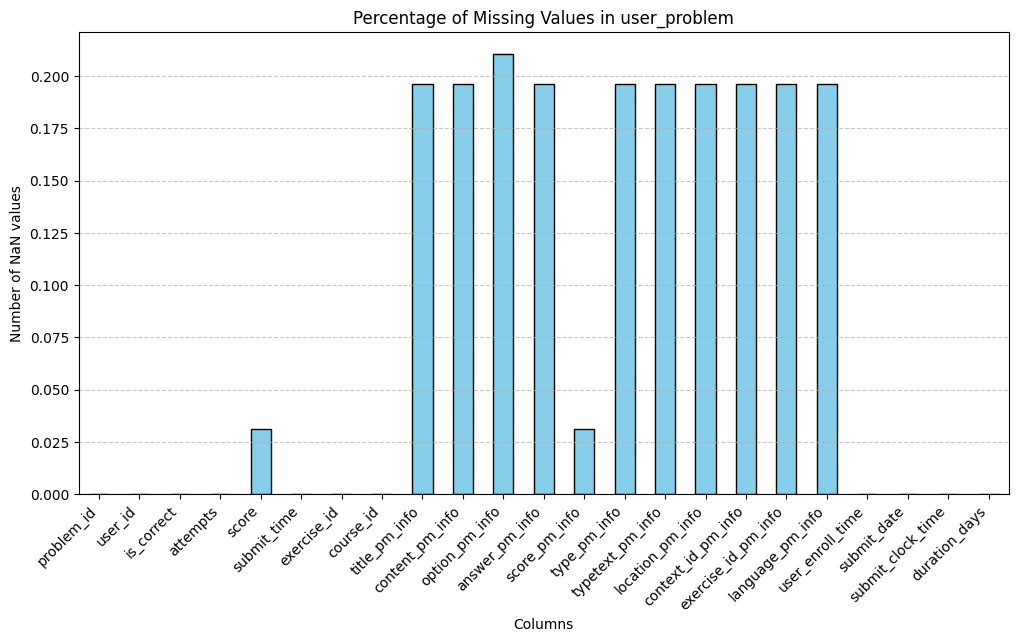

In [75]:
# Count NaN values per column
nan_counts = course_detail_problem_filtered.isna().mean()

# Plot bar chart
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize plot
plt.xlabel("Columns")
plt.ylabel("Number of NaN values")
plt.title("Percentage of Missing Values in user_problem")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

### score và score_pm_info đều nan

In [76]:
mask = (
    course_detail_problem_filtered['score'].isna() &
    course_detail_problem_filtered['score_pm_info'].isna()
)

In [77]:
mask_corect = (
    course_detail_problem_filtered['score'].isna() &
    course_detail_problem_filtered['score_pm_info'].isna() &
    (course_detail_problem_filtered['is_correct'] == 1)
)

course_detail_problem_filtered.loc[mask_corect, 'score'] = 1
course_detail_problem_filtered.loc[mask_corect, 'score_pm_info'] = 1

In [78]:
mask_incorrect = (
    course_detail_problem_filtered['score'].isna() &
    course_detail_problem_filtered['score_pm_info'].isna() &
    (course_detail_problem_filtered['is_correct'] == 0)
)
course_detail_problem_filtered.loc[mask_incorrect, 'score'] = 0
course_detail_problem_filtered.loc[mask_incorrect, 'score_pm_info'] = 1

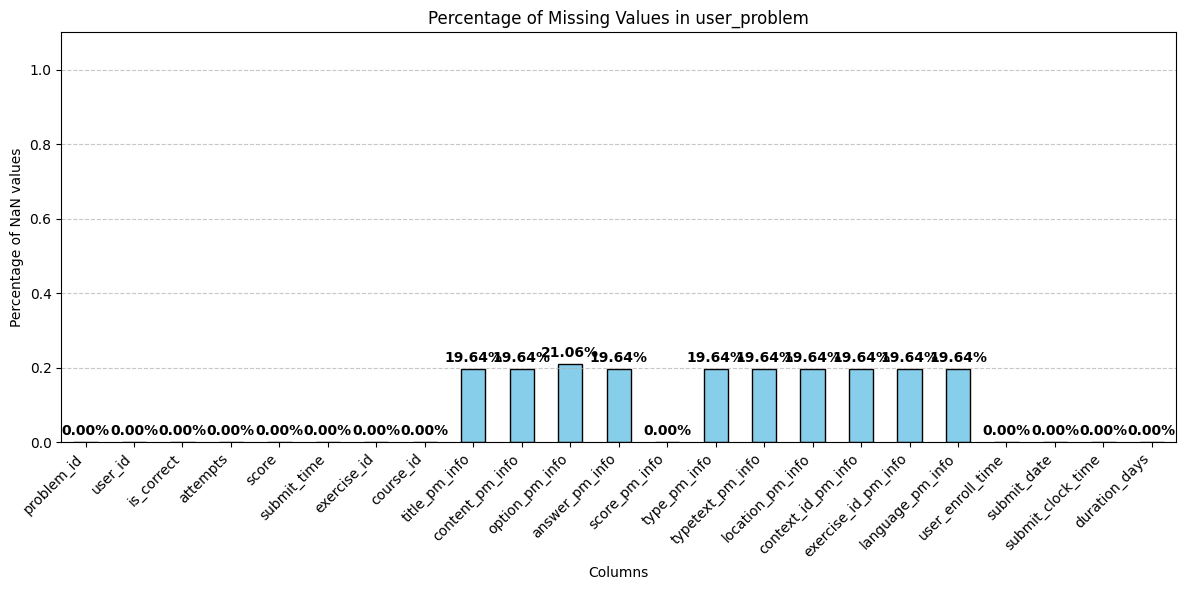

In [79]:
# Count NaN values per column (as percentage)
nan_counts = course_detail_problem_filtered.isna().mean()

# Plot bar chart
plt.figure(figsize=(12, 6))
ax = nan_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add value labels on top of bars
for i, v in enumerate(nan_counts):
    ax.text(i, v + 0.01, f"{v:.2%}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize plot
plt.xlabel("Columns")
plt.ylabel("Percentage of NaN values")
plt.title("Percentage of Missing Values in user_problem")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.ylim(0, 1.1)  # Set y-axis limit to leave space for annotations
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [80]:
course_detail_problem_filtered = course_detail_problem_filtered.drop(['submit_time', 'title_pm_info', 'content_pm_info',
                                     'option_pm_info', 'answer_pm_info', 'type_pm_info',
                                    'typetext_pm_info', 'exercise_id_pm_info'], axis=1)

In [81]:
# Group by problem_id and get the maximum score for each problem_id
max_scores = course_detail_problem_filtered[['problem_id', 'score']].groupby('problem_id')['score'].max().reset_index()


In [82]:
# Step 1: Get the max score per problem_id
max_scores = course_detail_problem_filtered[['problem_id', 'score']].groupby('problem_id')['score'].max().reset_index()
max_scores.rename(columns={'score': 'max_score'}, inplace=True)

# Step 2: Merge max_scores into the original DataFrame
course_detail_problem_filtered = course_detail_problem_filtered.merge(max_scores, on='problem_id', how='left')

# Step 3: Replace score_pm_info if it's lower than max_score
course_detail_problem_filtered['score_pm_info'] = course_detail_problem_filtered.apply(
    lambda row: row['max_score'] if row['score_pm_info'] < row['max_score'] else row['score_pm_info'],
    axis=1
)

# If needed, drop the helper 'max_score' column
course_detail_problem_filtered.drop(columns='max_score', inplace=True)

In [83]:
course_detail_problem_filtered.to_csv("user_problem_final.csv", index = False)

In [84]:
# mask = (
#     course_detail_problem_filtered['score'].notnull() &  # score is not NaN
#     course_detail_problem_filtered['score_pm_info'].isna() &  # score_pm_info is NaN
#     (course_detail_problem_filtered['is_correct'] == 1)  # is_correct is 1
# )

# course_detail_problem_filtered.loc[mask, 'score_pm_info'] = course_detail_problem_filtered.loc[mask, 'score']

In [85]:
# mask = (
#     course_detail_problem_filtered['score'].notna() &
#     course_detail_problem_filtered['score_pm_info'].isna() &
#     (course_detail_problem_filtered['is_correct'] == 1)
# )

# course_detail_problem_filtered.loc[mask, 'score_pm_info'] = course_detail_problem_filtered.loc[mask, 'score']

In [86]:
# # Count NaN values per column
# nan_counts = course_detail_problem_filtered.isna().mean()

# # Plot bar chart
# plt.figure(figsize=(12, 6))
# nan_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# # Customize plot
# plt.xlabel("Columns")
# plt.ylabel("Number of NaN values")
# plt.title("Percentage of Missing Values in user_problem")
# plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Show plot
# plt.show()